In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
data_train = pd.read_csv('train.csv')

In [ ]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data_train.replace(['male', 'female'], [1,0], inplace= True)
data_train.fillna(0, inplace = True)

In [ ]:
data_train.corr()

<ipython-input-76-e6bb2ed549f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.038125,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.361353,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.024978,-0.114631,-0.245489,-0.182333
Age,0.038125,0.010539,-0.361353,0.024978,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.184664,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.048786,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.135516,0.159651,0.216225,1.000000


In [ ]:
data_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [ ]:
X_train = np.array(data_train[['Pclass','Sex', 'Age','SibSp','Parch','Fare']])
X_train.shape

(891, 6)

In [ ]:
Y_train = np.array(data_train[['Survived']])
Y_train.shape

(891, 1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(X_train.shape[1], activation = "sigmoid"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(48, activation = "sigmoid"),
    tf.keras.layers.Dense(16, activation = "sigmoid"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "softmax")
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam (learning_rate = 0.01 ),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train , Y_train, epochs = 200)

Epoch 1/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8272
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8204
Epoch 3/200
28/28 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8148
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8171
Epoch 5/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4066 - accuracy: 0.8126
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8193
Epoch 7/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8227
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8215
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8103
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8171
Epoch 11/

In [ ]:
print(history.history)

{'loss': [0.3875124454498291, 0.38558486104011536, 0.3850316107273102, 0.4023021459579468, 0.40657591819763184, 0.39873307943344116, 0.4021359384059906, 0.39433661103248596, 0.3980758786201477, 0.39324289560317993, 0.3851412534713745, 0.3908155858516693, 0.39218568801879883, 0.3977380692958832, 0.4334220290184021, 0.4174273908138275, 0.3963785171508789, 0.392002671957016, 0.3900965452194214, 0.3919019401073456, 0.38582298159599304, 0.3863966763019562, 0.40087825059890747, 0.3928064703941345, 0.40440866351127625, 0.41982555389404297, 0.3960529565811157, 0.4041832983493805, 0.41067758202552795, 0.4001960754394531, 0.3971915543079376, 0.39305517077445984, 0.3963172733783722, 0.3945375978946686, 0.39422398805618286, 0.4013015627861023, 0.4160369038581848, 0.4099109172821045, 0.4036805331707001, 0.40130046010017395, 0.3928739130496979, 0.39844006299972534, 0.3940621018409729, 0.39134618639945984, 0.3936443626880646, 0.39379745721817017, 0.3878377079963684, 0.38949936628341675, 0.42548394203

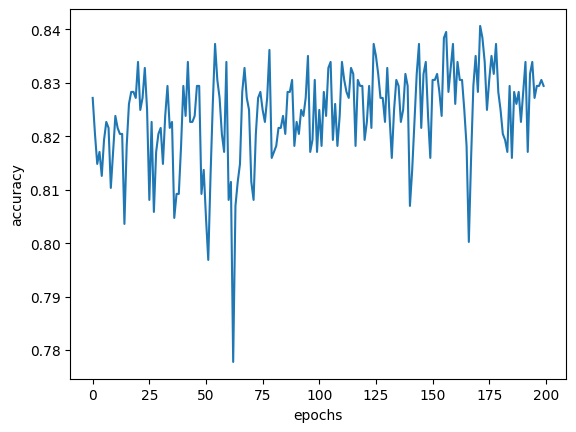

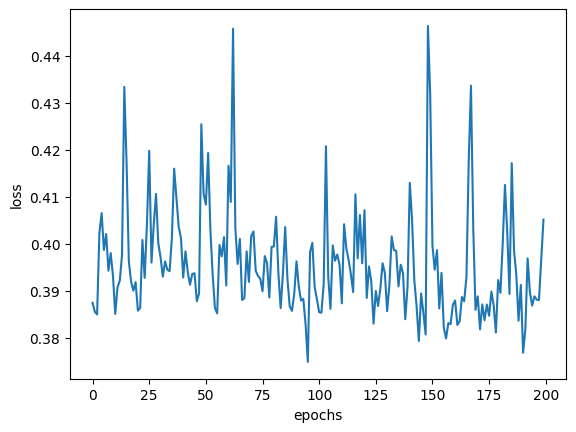

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
data_test = pd.read_csv('test.csv')
data_test_lable = pd.read_csv('gender_submission.csv')

In [ ]:
data_test['Survived'] = data_test_lable['Survived']

In [ ]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [ ]:
data_test.replace(['male', 'female'], [1,0], inplace= True)
data_test.fillna(0, inplace = True)

In [ ]:
data_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,S,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,S,1
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,0,S,0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,0,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,0,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,0,C,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,0,S,0


In [ ]:
X_test = np.array(data_test[['Pclass','Sex', 'Age','SibSp','Parch','Fare']])


In [ ]:
X_test
print(X_test.shape)


(418, 6)


In [ ]:
print(X_test[0])

[ 3.      1.     34.5     0.      0.      7.8292]


In [ ]:
Y_test = np.array(data_test['Survived'])

In [ ]:
model.evaluate(X_test , Y_test)

14/14 [==============================] - 0s 5ms/step - loss: 0.3396 - accuracy: 0.9019


[0.33962783217430115, 0.9019138813018799]

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
# for y_pred in Y_pred:
#   y_pred = np.argmax(y_pred)
#   # y_pred = np.where(y_pred>0.5, 1 , 0)
#   # print(y_pred)
print(Y_pred.shape)

14/14 [==============================] - 0s 4ms/step
(418,)


In [ ]:
Y_test.shape

(418,)

In [ ]:
Y_pred.shape

(418, 2)

In [ ]:
m = tf.keras.metrics.Recall()
m.update_state(Y_pred, Y_test)
print("Recall metrics of MLP is:" , m.result().numpy())

Recall metrics of MLP is: 0.9302326


In [ ]:
m = tf.keras.metrics.Precision()
m.update_state(Y_pred, Y_test)
print("Precision metrics of MLP is: " , m.result().numpy())

Precision metrics of MLP is:  0.7894737


In [ ]:
# from sklearn.metrics import precision_score , recall_score

In [ ]:
# precision = precision_score(Y_test, Y_pred)
# precision

0.9302325581395349

In [ ]:
# recall = recall_score(Y_test, Y_pred)
# recall

0.7894736842105263

In [316]:
#prediction Jack and Rose
x_rose = [1.0 , 0.0 , 24.0 , 0.0 , 1.0 , 61.1750 ]
x_rose = np.expand_dims(x_rose, axis= 0)
predictions = model.predict(x_rose)
prediction_ = np.argmax((predictions), axis = 1)
print(prediction_)

1/1 [==============================] - 0s 44ms/step
[1]


In [318]:
x_Jack = [1.0 , 1.0 , 24.0 , 0.0 , 0.0 , 7.6292  ]
x_Jack = np.expand_dims(x_Jack, axis= 0)
predictions = model.predict(x_Jack)
prediction_ = np.argmax((predictions), axis = 1)
print(prediction_)

1/1 [==============================] - 0s 24ms/step
[0]


#KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
test_score = neigh.score(X_test, Y_test)
print("accuracy with KNN: ", test_score)

accuracy with KNN:  0.65311004784689


#Perceptron


perceptron class

In [ ]:
class Perceptron:
    def __init__(self, epochs=200, lr=0.00001):
        self.w = np.random.rand(6, 1)
        self.b = np.random.rand(1, 1)
        self.lr = lr
        self.epochs = epochs

    def fit(self, x_train, y_train):
        for epoch in range(self.epochs):
            for i in range(x_train.shape[0]):
                y_pred = np.matmul(x_train[i], self.w) + self.b
                err = y_train[i] - y_pred
                self.w += (self.lr * x_train[i].T * err).T
                self.b += self.lr * err

    def predict(self, x):
        y_pred = np.matmul(x, self.w) + self.b
        return y_pred

    def evaluate(self, X, Y):
        y_pred = np.matmul(X, self.w) + self.b
        y_pred = np.where(y_pred < 0.5, 0, 1)
        return accuracy_score(Y, y_pred)

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
y_pred = perceptron.predict(X_test)
accuracy = perceptron.evaluate(X_test, Y_test)
print("accuracy of perceptron: ", accuracy)

accuracy of perceptron:  0.7631578947368421
